In [2]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import seaborn as sns
from datetime import date
from datetime import timedelta
import calendar

In [3]:
str1 = "/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/cmems_sla_monthly/dt_global_allsat_msla_h_y"
str2 = "_m"
curr = date(1993,1,1)
str3 = ".nc"

str4 = str1 + str(curr.year) + str2 + "0" + str(curr.month) + str3;
    
area = xr.open_mfdataset(str4)

while curr <= date(1996,11,1):
    days_in_month = calendar.monthrange(curr.year, curr.month)[1]
    curr += timedelta(days = days_in_month)
    print(str4)
    if curr.month < 10:
        str4 = str1 + str(curr.year) + str2 + "0" + str(curr.month) + str3;
    else:
        str4 = str1 + str(curr.year) + str2 + str(curr.month) + str3;
    area = xr.merge([area,xr.open_mfdataset(str4)])

# area = area.transpose()
area

/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/cmems_sla_monthly/dt_global_allsat_msla_h_y1993_m01.nc
/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/cmems_sla_monthly/dt_global_allsat_msla_h_y1993_m02.nc
/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/cmems_sla_monthly/dt_global_allsat_msla_h_y1993_m03.nc
/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/cmems_sla_monthly/dt_global_allsat_msla_h_y1993_m04.nc
/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/cmems_sla_monthly/dt_global_allsat_msla_h_y1993_m05.nc
/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/cmems_sla_monthly/dt_global_allsat_msla_h_y1993_m06.nc
/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/cmems_sla_monthly/dt_global_allsat_msla_h_y1993_m07.nc
/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/cmems_sla_monthly/dt_global_allsat_msla_h_y1993_m08.nc
/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/cmems_sla_monthly/dt_global_allsat_msla_h_y1993_m09.nc
/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/cmems_sla_monthly/dt_global_allsat_msla_h_y19

<xarray.Dataset>
Dimensions:           (latitude: 720, longitude: 1440, nv: 2, time: 48)
Coordinates:
  * time              (time) datetime64[ns] 1993-01-15 1993-02-15 ... 1996-12-15
  * latitude          (latitude) float32 -89.875 -89.625 ... 89.625 89.875
  * longitude         (longitude) float32 0.125 0.375 0.625 ... 359.625 359.875
  * nv                (nv) int32 0 1
Data variables:
    crs               int32 -2147483647
    climatology_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(48, 2), meta=np.ndarray>
    lat_bnds          (latitude, nv) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
    lon_bnds          (longitude, nv) float32 dask.array<chunksize=(1440, 2), meta=np.ndarray>
    sla               (time, latitude, longitude) float64 dask.array<chunksize=(48, 720, 1440), meta=np.ndarray>

In [4]:
def make_figure():
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

#     generate a basemap with country borders, oceans and coastlines
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.BORDERS, linestyle='dotted')
    return fig, ax

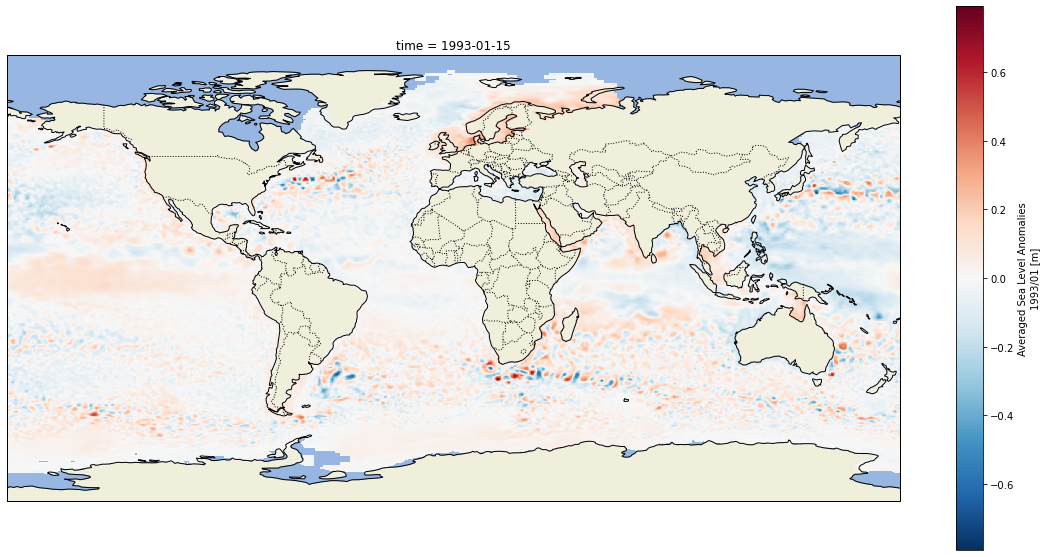

In [5]:
_, ax = make_figure()
grid = area.isel(time=0).sla
grid.plot(ax=ax, transform=ccrs.PlateCarree())

In [6]:
fig, ax = make_figure()

frames = area.time.size                   # Number of frames
min_value = float(area.sla.min().values)  # Lowest value
max_value = float(area.sla.max().values)  # Highest value

def draw(frame, add_colorbar):
    grid = area.isel(time=frame).sla
    contour = grid.plot(ax=ax, transform=ccrs.PlateCarree(),add_colorbar=add_colorbar, vmin=min_value, vmax=max_value ,cmap = "coolwarm")
    title = "Time - " + str(grid.time.values)
    ax.set_title(title)
    return contour


def init():
    return draw(0, add_colorbar=True)


def animate(frame):
    return draw(frame, add_colorbar=False)


ani = animation.FuncAnimation(fig, animate, frames, interval=0.01, blit=False,init_func=init, repeat=False)
plt.close(fig)

In [ ]:
ani.save('sla.mp4', writer=animation.FFMpegWriter(fps=5))